In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv(r'/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding = 'windows-1254')

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape

(9994, 21)

In [8]:
df.describe().round(2)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df['Order Date']

0        11/8/2016
1        11/8/2016
2        6/12/2016
3       10/11/2015
4       10/11/2015
           ...    
9989     1/21/2014
9990     2/26/2017
9991     2/26/2017
9992     2/26/2017
9993      5/4/2017
Name: Order Date, Length: 9994, dtype: object

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%Y')

In [12]:
df['Order Date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [13]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [14]:
df['Profitability'] = df['Profit'] / df['Sales']

In [15]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,Profitability
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,8,0.16
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,8,0.30


In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Day              0
Profitability    0
dtype: int64

In [17]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Year',
 'Month',
 'Day',
 'Profitability']

## States with the highest sales

In [18]:
top_state = df.groupby(['State']).sum().sort_values('Sales', ascending = False).head(20)

top_state = top_state[['Sales']].round(2)

top_state.reset_index(inplace = True)

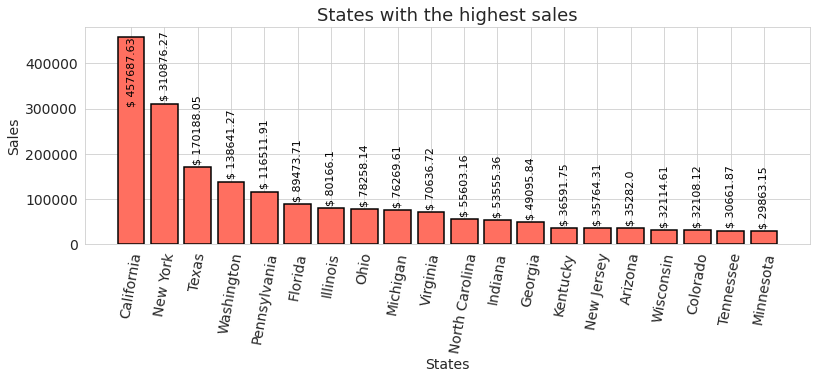

In [19]:
plt.figure(figsize = (13, 4))
plt.title('States with the highest sales', fontsize = 18)
plt.bar(top_state['State'], top_state['Sales'], color = '#FF6F60', edgecolor = 'black', lw = 1.5)

plt.xlabel('States', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)

plt.xticks(rotation = 80, fontsize = 14)
plt.yticks(fontsize = 14)

for k, v in top_state['Sales'].items():
    if v < 330000:
        plt.text(k, v+10000, '$ ' + str(v), fontsize = 11, rotation = 90, color = 'k', horizontalalignment = 'center')
    else:
        plt.text(k, v-150000, '$ ' + str(v), fontsize = 11, rotation = 90, color = 'k', horizontalalignment = 'center')

plt.show()

## Highest states by profit

In [20]:
top_states_profit = df.groupby(['State']).sum().sort_values('Profit', ascending = False).head(20)

top_states_profit = top_states_profit[['Profit']].round(2)

top_states_profit.reset_index(inplace = True)

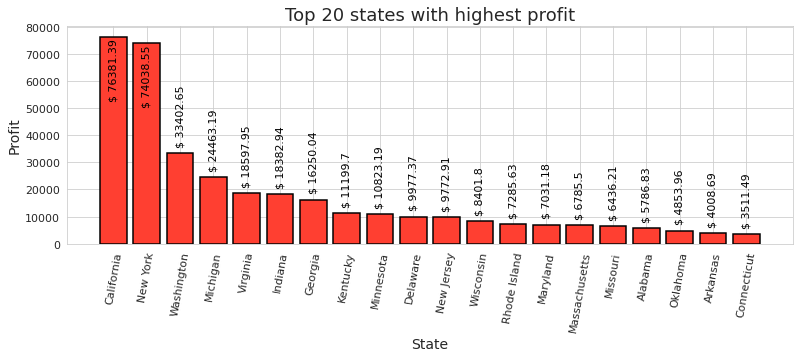

In [21]:
plt.figure(figsize = (13, 4))
plt.title('Top 20 states with highest profit', fontsize = 18)

plt.bar(top_states_profit['State'], top_states_profit['Profit'], color = '#FF3F31', edgecolor = 'black', lw = 1.5)

plt.xlabel('State', fontsize = 14)
plt.ylabel('Profit', fontsize = 14)

plt.xticks(fontsize = 11, rotation = 80)
plt.yticks(fontsize = 11)

for k, v in top_states_profit['Profit'].items():
    if v < 70000:
        plt.text(k, v+3000, '$ ' + str(v), fontsize = 11, color = 'k', rotation = 90, horizontalalignment = 'center')
    else:
        plt.text(k, v-23000, '$ ' + str(v), fontsize = 11, color = 'k', rotation = 90, horizontalalignment = 'center')

plt.show()

## Cities with the highest sales

In [22]:
top_city = df.groupby(df['City']).sum().sort_values('Sales', ascending = False).head(20)

top_city = top_city[['Sales']].round(2)

top_city.reset_index(inplace = True)

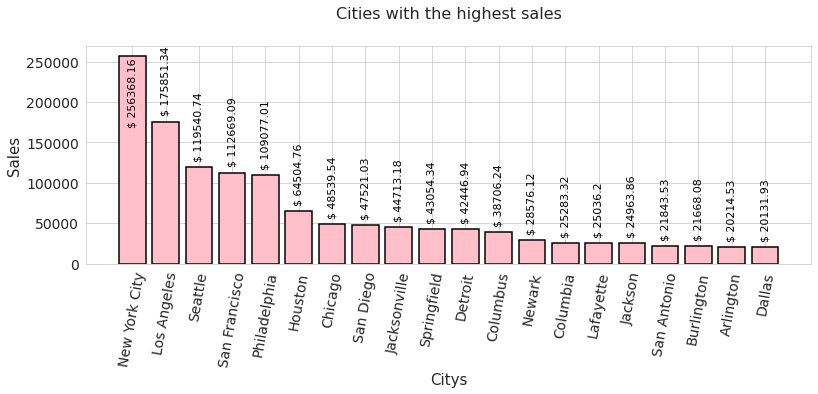

In [23]:
plt.figure(figsize = (13, 4))

plt.title('Cities with the highest sales', fontsize = 16, y = 1.1)

plt.bar(top_city['City'], top_city['Sales'], color = 'pink', edgecolor = 'black', linewidth = 1.5)
plt.xlabel('Citys', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

plt.xticks(fontsize = 14, rotation = 80)
plt.yticks(fontsize = 14)

for k, v in top_city['Sales'].items():
    if v > 200000:
        plt.text(k, v-84800, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

    else:
        plt.text(k, v+10000, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

## Top profit cities

In [24]:
top_city_profit = df.groupby(df['City']).sum().sort_values('Profit', ascending = False).head(20)

top_city_profit = top_city_profit[['Profit']].round(2)

top_city_profit.reset_index(inplace = True)

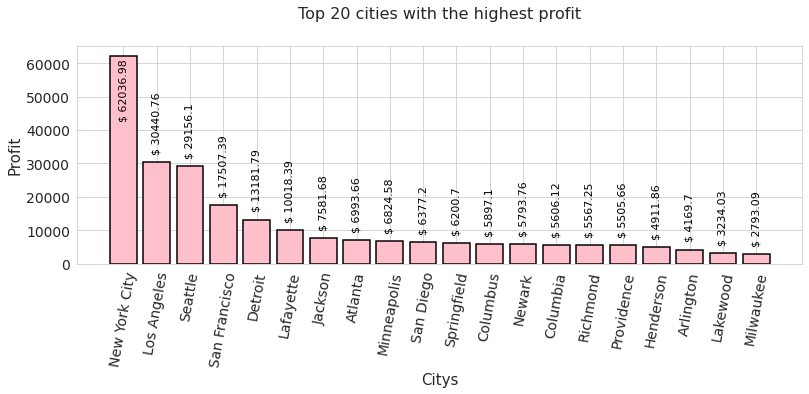

In [25]:
plt.figure(figsize = (13, 4))

plt.title('Top 20 cities with the highest profit', fontsize = 16, y = 1.1)

plt.bar(top_city_profit['City'], top_city_profit['Profit'], color = 'pink', edgecolor = 'black', linewidth = 1.5)
plt.xlabel('Citys', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

plt.xticks(fontsize = 14, rotation = 80)
plt.yticks(fontsize = 14)

for k, v in top_city_profit['Profit'].items():
    if v > 60000:
        plt.text(k, v-18800, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

    else:
        plt.text(k, v+3000, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

## Customers with the highest sales

In [26]:
top_customers = df.groupby(df['Customer Name']).sum().sort_values('Sales', ascending = False).head(20)

top_customers = top_customers[['Sales']].round(2)

top_customers.reset_index(inplace = True)

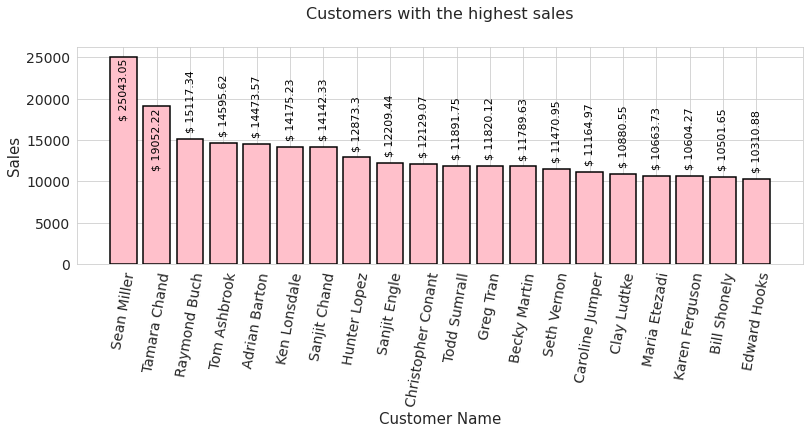

In [27]:
plt.figure(figsize = (13, 4))

plt.title('Customers with the highest sales', fontsize = 16, y = 1.1)

plt.bar(top_customers['Customer Name'], top_customers['Sales'], color = 'pink', edgecolor = 'black', linewidth = 1.5)
plt.xlabel('Customer Name', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

plt.xticks(fontsize = 14, rotation = 80)
plt.yticks(fontsize = 14)

for k, v in top_customers['Sales'].items():
    if v > 18000:
        plt.text(k, v-7500, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

    else:
        plt.text(k, v+1000, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

## Highest customers profit

In [28]:
top_customers_profit = df.groupby(df['Customer Name']).sum().sort_values('Profit', ascending = False).head(20)

top_customers_profit = top_customers_profit[['Profit']].round(2)

top_customers_profit.reset_index(inplace = True)

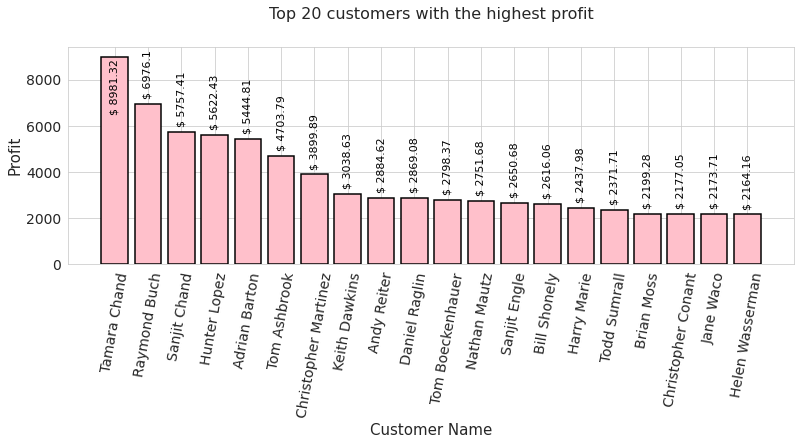

In [29]:
plt.figure(figsize = (13, 4))

plt.title('Top 20 customers with the highest profit', fontsize = 16, y = 1.1)

plt.bar(top_customers_profit['Customer Name'], top_customers_profit['Profit'], color = 'pink', edgecolor = 'black', linewidth = 1.5)
plt.xlabel('Customer Name', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

plt.xticks(fontsize = 14, rotation = 80)
plt.yticks(fontsize = 14)

for k, v in top_customers_profit['Profit'].items():
    if v > 8000:
        plt.text(k, v-2400, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

    else:
        plt.text(k, v+300, '$ ' + str(v), fontsize=11, rotation=90, color='k', horizontalalignment='center')

## Best Products

In [30]:
top_products = df.groupby(['Product Name']).sum().sort_values('Sales', ascending = False).head(20)

top_products = top_products[['Sales']].round(2)

top_products.reset_index(inplace = True)

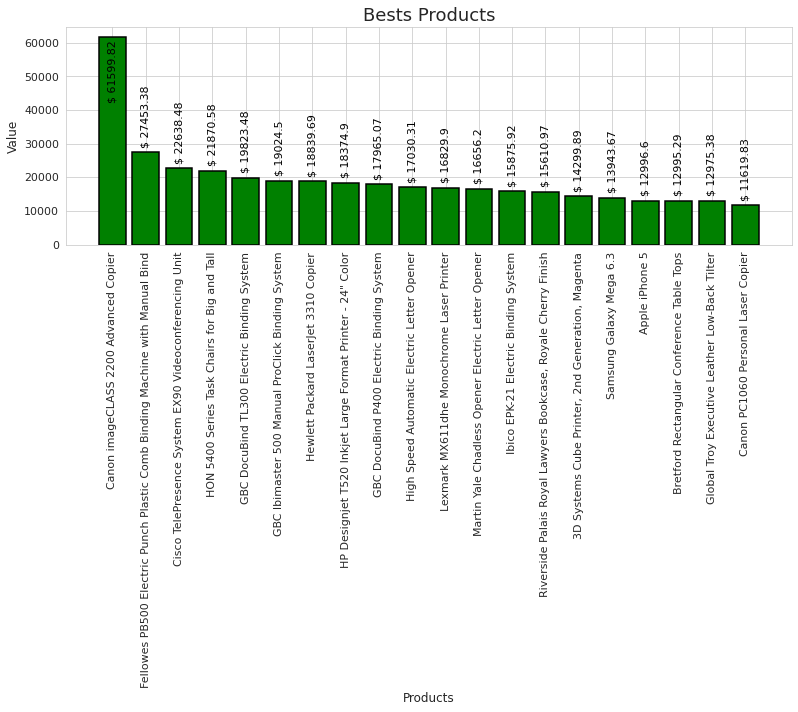

In [31]:
plt.figure(figsize = (13, 4))

plt.title('Bests Products', fontsize = 18)

plt.bar(top_products['Product Name'], top_products['Sales'], color = 'green', edgecolor = 'black', lw = 1.5)

plt.xlabel('Products', fontsize = 12)
plt.ylabel('Value', fontsize = 12)

plt.yticks(fontsize = 11)
plt.xticks(rotation = 90, fontsize = 11)

for k, v in top_products['Sales'].items():
    if v > 30000:
        plt.text(k, v-19000, '$ ' + str(v), fontsize = 11, color = 'k', rotation = 90, horizontalalignment = 'center')
    else:
        plt.text(k, v+2000, '$ ' + str(v), fontsize = 11, color = 'k', rotation = 90, horizontalalignment = 'center')

## Best Products Profit

In [32]:
top_products_profit = df.groupby(['Product Name']).sum().sort_values('Profit', ascending = False).head(20)

top_products_profit = top_products_profit[['Profit']].round(2)

top_products_profit.reset_index(inplace = True)

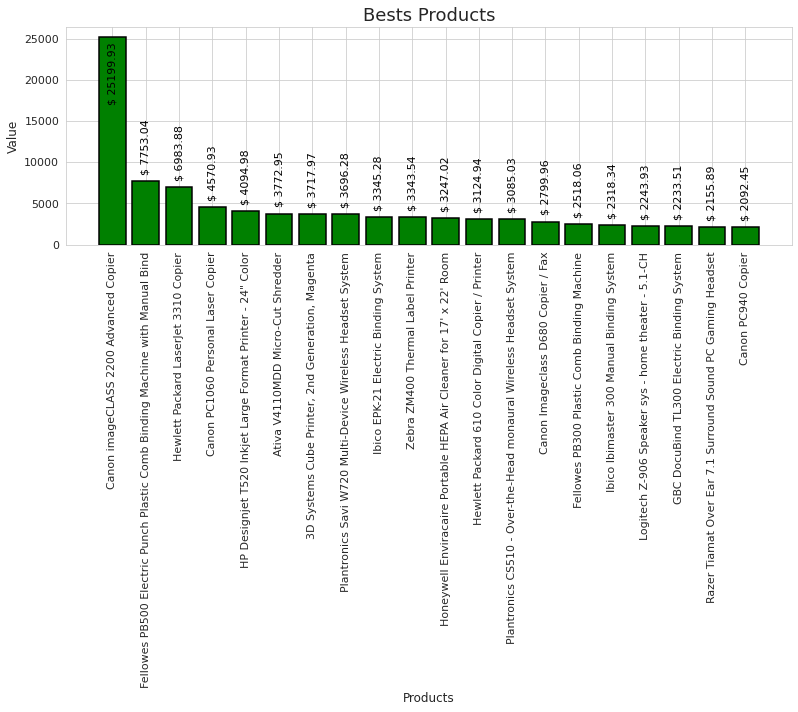

In [33]:
plt.figure(figsize = (13, 4))

plt.title('Bests Products', fontsize = 18)

plt.bar(top_products_profit['Product Name'], top_products_profit['Profit'], color = 'green', edgecolor = 'black', lw = 1.5)

plt.xlabel('Products', fontsize = 12)
plt.ylabel('Value', fontsize = 12)

plt.yticks(fontsize = 11)
plt.xticks(rotation = 90, fontsize = 11)

for k, v in top_products_profit['Profit'].items():
    if v > 25000:
        plt.text(k, v-8000, '$ ' + str(v), fontsize = 11, color = 'k', rotation = 90, horizontalalignment = 'center')
    else:
        plt.text(k, v+1000, '$ ' + str(v), fontsize = 11, color = 'k', rotation = 90, horizontalalignment = 'center')

In [34]:
print(top_products_profit['Profit'].sum().round(2))
print(top_products_profit['Profit'][0])

((top_products_profit['Profit'][0] * 100) / top_products_profit['Profit'].sum()).round(2)

92297.91
25199.93


27.3

## Time Series

<AxesSubplot:xlabel='Year,Month'>

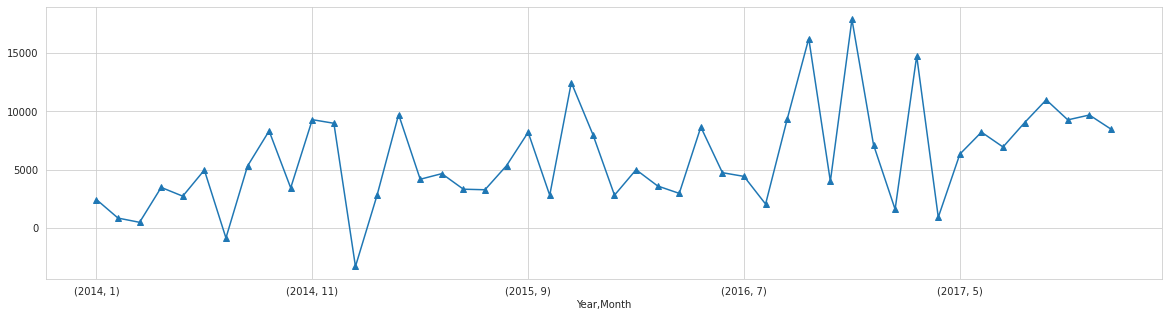

In [35]:
plt.figure(figsize=(20,5))
df.groupby(['Year','Month'])['Profit'].sum().plot(marker = '^')

In [36]:
mask = (df['Order Date'] > '2014-01-01') & (df['Order Date'] <= '2014-12-31')
filtered_df_2014 = df.loc[mask]

mask_2 = (df['Order Date'] > '2015-01-01') & (df['Order Date'] <= '2015-12-31')
filtered_df_2015 = df.loc[mask_2]

mask_3 = (df['Order Date'] > '2016-01-01') & (df['Order Date'] <= '2016-12-31')
filtered_df_2016 = df.loc[mask_3]

mask_4 = (df['Order Date'] > '2017-01-01') & (df['Order Date'] <= '2017-12-31')
filtered_df_2017 = df.loc[mask_4]

## Series Sales

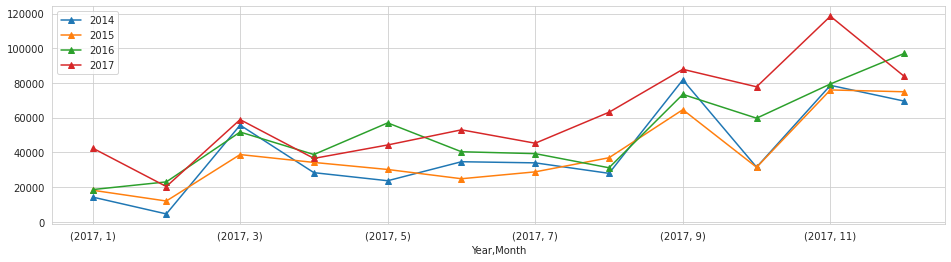

In [37]:
fig = plt.figure()

filtered_df_2014.groupby(['Year', 'Month',])['Sales'].sum().plot(marker = '^', label = '2014')
filtered_df_2015.groupby(['Year', 'Month',])['Sales'].sum().plot(marker = '^', label = '2015')
filtered_df_2016.groupby(['Year', 'Month',])['Sales'].sum().plot(marker = '^', label = '2016')
filtered_df_2017.groupby(['Year', 'Month',])['Sales'].sum().plot(marker = '^', label = '2017')

fig.set_figheight(4)
fig.set_figwidth(16)

plt.legend()

## Series Profit

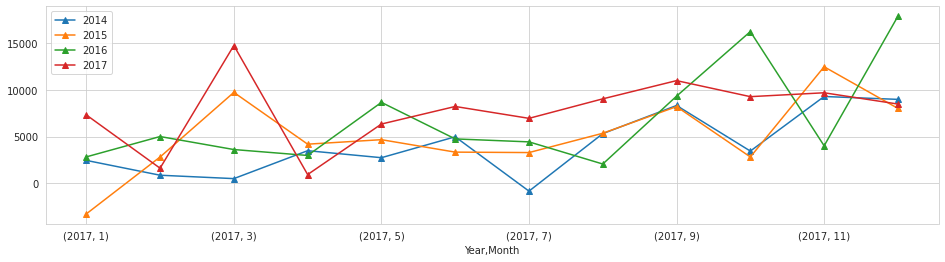

In [38]:
fig = plt.figure()

filtered_df_2014.groupby(['Year', 'Month',])['Profit'].sum().plot(marker = '^', label = '2014')
filtered_df_2015.groupby(['Year', 'Month',])['Profit'].sum().plot(marker = '^', label = '2015')
filtered_df_2016.groupby(['Year', 'Month',])['Profit'].sum().plot(marker = '^', label = '2016')
filtered_df_2017.groupby(['Year', 'Month',])['Profit'].sum().plot(marker = '^', label = '2017')

fig.set_figheight(4)
fig.set_figwidth(16)

plt.legend()

## Sales Series - Mean

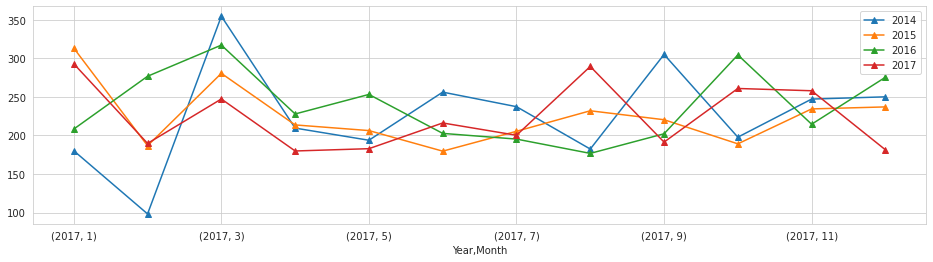

In [39]:
fig = plt.figure()

filtered_df_2014.groupby(['Year', 'Month',])['Sales'].mean().plot(marker = '^', label = '2014')
filtered_df_2015.groupby(['Year', 'Month',])['Sales'].mean().plot(marker = '^', label = '2015')
filtered_df_2016.groupby(['Year', 'Month',])['Sales'].mean().plot(marker = '^', label = '2016')
filtered_df_2017.groupby(['Year', 'Month',])['Sales'].mean().plot(marker = '^', label = '2017')

fig.set_figheight(4)
fig.set_figwidth(16)

plt.legend()

## Profit Series - Mean

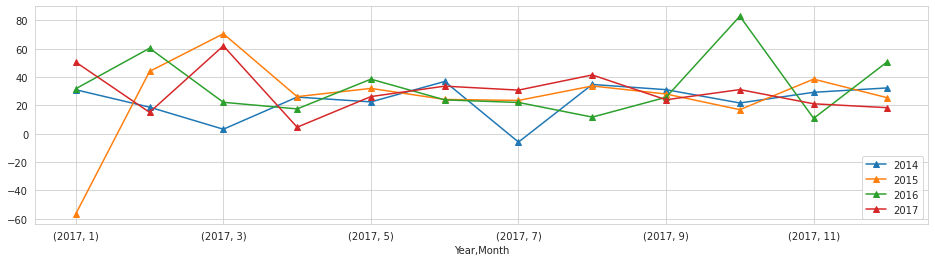

In [40]:
fig = plt.figure()

filtered_df_2014.groupby(['Year', 'Month',])['Profit'].mean().plot(marker = '^', label = '2014')
filtered_df_2015.groupby(['Year', 'Month',])['Profit'].mean().plot(marker = '^', label = '2015')
filtered_df_2016.groupby(['Year', 'Month',])['Profit'].mean().plot(marker = '^', label = '2016')
filtered_df_2017.groupby(['Year', 'Month',])['Profit'].mean().plot(marker = '^', label = '2017')

fig.set_figheight(4)
fig.set_figwidth(16)

plt.legend()

In [41]:
media_movel_7dias_2014 = filtered_df_2014.rolling(7).mean()
media_movel_7dias_2015 = filtered_df_2015.rolling(7).mean()

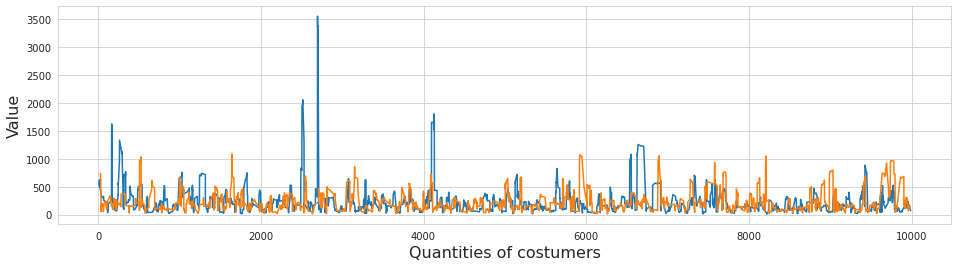

In [42]:
fig = plt.figure()

plt.plot(media_movel_7dias_2014['Sales'])
plt.plot(media_movel_7dias_2015['Sales'])

plt.xlabel('Quantities of costumers', fontsize = 16)
plt.ylabel('Value', fontsize = 16)

fig.set_figheight(4)
fig.set_figwidth(16)

## Profit percentage of the first 10 customers

In [43]:
((top_customers_profit.iloc[0:10]['Profit'].sum() * 100)/ df['Profit'].sum()).round(2)

17.52

## Percentage of the best profit product

In [44]:
print('Product: {}'.format(top_products_profit['Product Name'][0]))

print('Profit Value: ${:.2f}'.format(top_products_profit['Profit'][0]))

print('Percentage: {:.2f}%'.format((top_products_profit['Profit'][0] * 100) / top_products_profit['Profit'].sum()))

Product: Canon imageCLASS 2200 Advanced Copier
Profit Value: $25199.93
Percentage: 27.30%


In [45]:
best_product = df.loc[df['Product Name'] == 'Canon imageCLASS 2200 Advanced Copier']

In [46]:
best_product[['Ship Date' ,'Customer Name' , 'Segment' ,'Product Name', 'City' ,'Quantity', 'Sales', 'Profit', 'Discount']]

,Ship Date,Customer Name,Segment,Product Name,City,Quantity,Sales,Profit,Discount
2623,10/24/2017,Tom Ashbrook,Home Office,Canon imageCLASS 2200 Advanced Copier,New York City,4,11199.968,3919.9888,0.2
4190,11/22/2017,Hunter Lopez,Consumer,Canon imageCLASS 2200 Advanced Copier,Newark,3,10499.970,5039.9856,0.0
6425,5/27/2016,Christopher Conant,Consumer,Canon imageCLASS 2200 Advanced Copier,Philadelphia,4,8399.976,1119.9968,0.4
6826,10/9/2016,Tamara Chand,Corporate,Canon imageCLASS 2200 Advanced Copier,Lafayette,5,17499.950,8399.9760,0.0
8153,3/25/2017,Raymond Buch,Consumer,Canon imageCLASS 2200 Advanced Copier,Seattle,4,13999.960,6719.9808,0.0


### Product best costumer buy

In [47]:
df.loc[df['Customer Name'] == 'Sean Miller']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,Profitability
2266,2267,CA-2017-149146,2017-10-12,10/12/2017,Same Day,SM-20320,Sean Miller,Home Office,United States,Monroe,...,Paper,Xerox 1989,7.968,2,0.2,2.6892,2017,10,12,0.337500
2573,2574,CA-2017-145128,2017-07-09,7/14/2017,Standard Class,SM-20320,Sean Miller,Home Office,United States,Lafayette,...,Furnishings,Eldon Antistatic Chair Mats for Low to Medium ...,526.450,5,0.0,31.5870,2017,7,9,0.060000
2696,2697,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,821.300,4,0.5,-16.4260,2014,3,18,-0.020000
2697,2698,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,2014,3,18,-0.080000
2698,2699,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Paper,Xerox 195,21.376,4,0.2,7.4816,2014,3,18,0.350000
2699,2700,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Art,Avery Fluorescent Highlighter Four-Color Set,8.016,3,0.2,1.0020,2014,3,18,0.125000
2700,2701,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",30.768,2,0.2,8.0766,2014,3,18,0.262500
2701,2702,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Fasteners,Staples,18.936,3,0.2,5.9175,2014,3,18,0.312500
2702,2703,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Furnishings,"Dana Fluorescent Magnifying Lamp, White, 36""",122.352,3,0.2,15.2940,2014,3,18,0.125000
7853,7854,CA-2015-144890,2015-12-25,12/29/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Los Angeles,...,Paper,Xerox 1949,9.960,2,0.0,4.8804,2015,12,25,0.490000


In [48]:
df.loc[df['Customer Name'] == 'Tamara Chand']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,Profitability
2072,2073,CA-2016-129693,2016-11-26,12/2/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Seattle,...,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,7.312,2,0.2,2.5592,2016,11,26,0.3500
3185,3186,CA-2014-123498,2014-11-07,11/9/2014,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,Binders,Satellite Sectional Post Binders,26.046,3,0.8,-44.2782,2014,11,7,-1.7000
3186,3187,CA-2014-123498,2014-11-07,11/9/2014,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,Envelopes,Staple envelope,74.352,3,0.2,26.9526,2014,11,7,0.3625
6825,6826,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,2016,10,2,0.1500
6826,6827,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,2016,10,2,0.4800
6827,6828,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Binders,Ibico Ibimaster 300 Manual Binding System,735.980,2,0.0,331.1910,2016,10,2,0.4500
6828,6829,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",34.370,7,0.0,16.8413,2016,10,2,0.4900
6829,6830,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Art,Stanley Bostitch Contemporary Electric Pencil ...,33.960,2,0.0,9.5088,2016,10,2,0.2800
8060,8061,CA-2015-156013,2015-09-20,9/26/2015,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,...,Paper,Xerox 1881,61.400,5,0.0,28.8580,2015,9,20,0.4700
8061,8062,CA-2015-156013,2015-09-20,9/26/2015,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,...,Binders,Recycled Premium Regency Composition Covers,24.448,2,0.2,8.8624,2015,9,20,0.3625


## Pareto Principle

In [49]:
df2 = pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))

In [50]:
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [51]:
df2[df2['Profit'] >= 463.269].sum() / df['Profit'].sum()

Profit    0.971351
dtype: float64

## Top 30% occupy 97% of Profit! 
### This is why we must manage the top 30% of customers !